In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
events_df = pd.read_csv("../Data/events.csv")
people_df = pd.read_csv("../Data/people.csv")

In [3]:
events_df.head()

,Unnamed: 0,Case Number,Area of Impact,Standard of Evenidence,Event Number,Vehicle 1,Vehicle 2
0,0,60005,Non-Collision,Rollover/Overturn,1,1,9999
1,1,60005,Other Objects Set-In-Motion,Motor Vehicle In-Transport Strikes or is Struc...,2,1,2
2,2,60005,Not Reported,Motor Vehicle In-Transport,3,1,2
3,3,60005,Non-Collision,Fire/Explosion,4,1,9999
4,4,60005,Non-Collision,Fire/Explosion,5,2,9999


In [4]:
people_df.head()

,Unnamed: 0,Case Number,Description of Veh Coll,Day of Week,Drunk Driver,Year,Month,Hour,Time of Accident,Speed Limit Exceeded,...,Age,Age Name,County,Death DANAME,DOA Name,Injury,Race,Death,Road_Type,Sex
0,0,60005,"Motor Vehicle struck by falling cargo,or somet...",Thursday,0,2014,January,16,16:10,"Yes, Exceeded Speed Limit",...,22 Years,22 Years,SAN DIEGO (73),9,Died at Scene,Fatal Injury (K),Black,Died at Scene,Urban-Principal Arterial-Interstate,Male
1,1,60005,"Motor Vehicle struck by falling cargo,or somet...",Thursday,0,2014,January,16,16:10,No,...,53 Years,53 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,Urban-Principal Arterial-Interstate,Female
2,0,60006,None,Thursday,1,2013,January,18,18:8,No,...,67 Years,67 Years,SAN DIEGO (73),3,Died at Scene,Fatal Injury (K),White,Died at Scene,Rural-Local Road or Street,Male
3,0,60007,None,Tuesday,1,2013,January,0,0:15,"Yes, Too Fast for Conditions",...,21 Years,21 Years,SAN DIEGO (73),19,Not Applicable,Fatal Injury (K),White,Not Applicable,Urban-Minor Arterial,Female
4,0,60007,None,Thursday,0,2018,January,17,17:25,No,...,30 Years,30 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,NaN,Male


(-1.1205528838184617,
 1.1106734355073486,
 -1.2104541724168114,
 1.1135989644439959)

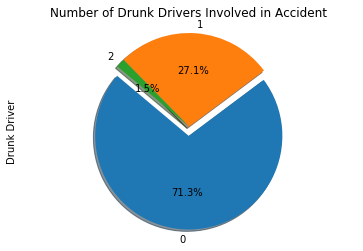

In [5]:
drunk_driver = people_df["Drunk Driver"].value_counts()
drunk_driver.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.title("Number of Drunk Drivers Involved in Accident")
plt.axis('equal')

In [6]:
people_df["Speed Limit Exceeded"].value_counts()

No                                             3112
Yes, Too Fast for Conditions                    478
Yes                                             278
Unknown                                         110
Yes, Exceeded Speed Limit                        47
Yes, Specifics Unknown                           29
No Driver Present/Unknown if Driver Present      13
Reported as Unknown                              10
Yes, Racing                                       8
Name: Speed Limit Exceeded, dtype: int64

In [7]:
people_df["Speed Limit Exceeded"] = people_df["Speed Limit Exceeded"].replace({"Yes, Too Fast for Conditions": "Yes",
                                                                              "Yes, Exceeded Speed Limit": "Yes",
                                                                              "Yes, Specifics Unknown": "Yes",
                                                                              "Yes, Racing": "Yes",
                                                                              "Reported as Unknown": "Unknown",
                                                                              "No Driver Present/Unknown if Driver Present": "Unknown"})


Text(0.5, 1.0, 'Was the Driver Speeding?')

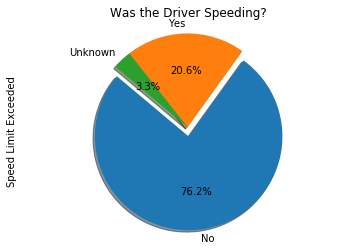

In [8]:
speeding = people_df["Speed Limit Exceeded"].value_counts()
speeding.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title('Was the Driver Speeding?')

Text(0, 0.5, 'Number of Accidents')

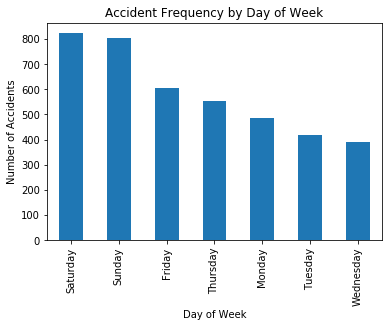

In [9]:
day_of_week = people_df["Day of Week"].value_counts()
day_of_week.plot(kind="bar")
plt.title("Accident Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")

In [10]:
# Create the bins in which Data will be held
bins = [0, 3, 7, 11, 15, 19, 24]

# Create the names for the four bins
group_names = ["Midnight - 3:59 a.m.", "4 a.m. - 7:59 a.m.", "8 a.m. - 11:59 a.m.", "Noon - 3:59 p.m.", "4 p.m. - 7:59 p.m.", "8 p.m. - 11:59 p.m."]

In [12]:
people_df["Time Range"] = pd.cut(people_df["Hour"], bins, labels=group_names, include_lowest=True)
people_df

,Unnamed: 0,Case Number,Description of Veh Coll,Day of Week,Drunk Driver,Year,Month,Hour,Time of Accident,Speed Limit Exceeded,...,Age Name,County,Death DANAME,DOA Name,Injury,Race,Death,Road_Type,Sex,Time Range
0,0,60005,"Motor Vehicle struck by falling cargo,or somet...",Thursday,0,2014,January,16,16:10,Yes,...,22 Years,SAN DIEGO (73),9,Died at Scene,Fatal Injury (K),Black,Died at Scene,Urban-Principal Arterial-Interstate,Male,4 p.m. - 7:59 p.m.
1,1,60005,"Motor Vehicle struck by falling cargo,or somet...",Thursday,0,2014,January,16,16:10,No,...,53 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,Urban-Principal Arterial-Interstate,Female,4 p.m. - 7:59 p.m.
2,0,60006,None,Thursday,1,2013,January,18,18:8,No,...,67 Years,SAN DIEGO (73),3,Died at Scene,Fatal Injury (K),White,Died at Scene,Rural-Local Road or Street,Male,4 p.m. - 7:59 p.m.
3,0,60007,None,Tuesday,1,2013,January,0,0:15,Yes,...,21 Years,SAN DIEGO (73),19,Not Applicable,Fatal Injury (K),White,Not Applicable,Urban-Minor Arterial,Female,Midnight - 3:59 a.m.
4,0,60007,None,Thursday,0,2018,January,17,17:25,No,...,30 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,NaN,Male,4 p.m. - 7:59 p.m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0,63518,None,Saturday,0,2017,September,10,10:52,No,...,32 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,NaN,Male,8 a.m. - 11:59 a.m.
4081,1,63518,None,Saturday,0,2017,September,10,10:52,No,...,32 Years,SAN DIEGO (73),10,Not Applicable,Fatal Injury (K),White,Not Applicable,NaN,Male,8 a.m. - 11:59 a.m.
4082,0,63569,None,Wednesday,0,2016,July,22,22:15,No,...,61 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,NaN,Male,8 p.m. - 11:59 p.m.
4083,0,63582,None,Thursday,0,2017,November,16,16:51,Yes,...,33 Years,SAN DIEGO (73),Not Applicable (Non-Fatal),Not Applicable,No Apparent Injury (O),Not a Fatality (not Applicable),Not Applicable,NaN,Male,4 p.m. - 7:59 p.m.


In [24]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df

,Unnamed: 0,Case Number,Description of Veh Coll,Day of Week,Drunk Driver,Year,Month,Hour,Time of Accident,Speed Limit Exceeded,...,Age,Age Name,County,Death DANAME,DOA Name,Injury,Race,Death,Road_Type,Sex
Time Range,,,,,,,,,,,,,,,,,,,,,
Midnight - 3:59 a.m.,593,593,593,593,593,593,593,593,593,593,...,593,593,593,593,593,593,593,593,301,593
4 a.m. - 7:59 a.m.,454,454,454,454,454,454,454,454,454,454,...,454,454,454,454,454,454,454,454,238,454
8 a.m. - 11:59 a.m.,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,473,473,473,473,271,473
Noon - 3:59 p.m.,748,748,748,748,748,748,748,748,748,748,...,748,748,748,748,748,748,748,748,381,748
4 p.m. - 7:59 p.m.,941,941,941,941,941,941,941,941,941,941,...,941,941,941,941,941,941,941,941,505,941
8 p.m. - 11:59 p.m.,845,845,845,845,845,845,845,845,845,845,...,845,845,845,845,845,845,845,845,366,845


Text(0.5, 1.0, 'Accident Frequency by Time of Day')

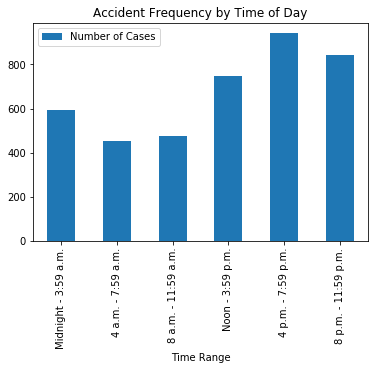

In [25]:
time_df = time_df[["Case Number"]]
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df.plot(kind="bar")
plt.title("Accident Frequency by Time of Day")

In [29]:
people_df["Sex"].value_counts()

Male                   2621
Female                 1373
Unknown                  77
Reported as Unknown      11
Not Reported              3
Name: Sex, dtype: int64

In [30]:
people_df["Sex"] = people_df["Sex"].replace({"Reported as Unknown": "Unknown",
                                            "Not Reported": "Unknown"})
gender = people_df["Sex"].value_counts()
gender

Male       2621
Female     1373
Unknown      91
Name: Sex, dtype: int64

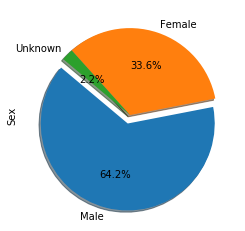

In [31]:
gender.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title()